In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


2. Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is: https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

   You can pass this into the .get() method of the requests module to get the HTML.

In [2]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')


3. Create a BeautifulSoup object called soup to traverse this HTML.

   Use "html.parser" as the parser, and the content of the response you got from your request as the document.

In [3]:
soup = BeautifulSoup(webpage.text, 'html.parser')

## How are ratings distributed?

How many terrible chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram of this data.

The first thing to do is to put all of the ratings into a list.

Use a command on the soup object to get all of the tags that contain the ratings.

In [4]:
ratings_data = soup.find_all(attrs={"class": "Rating"})
ratings = []


Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [5]:
for rating in ratings_data[1:]:
    ratings.append(float(rating.string))
    print(rating)

 class="Rating">2.75</td>
<td class="Rating">3.5</td>
<td class="Rating">2.75</td>
<td class="Rating">3</td>
<td class="Rating">3.25</td>
<td class="Rating">3.75</td>
<td class="Rating">2.75</td>
<td class="Rating">3</td>
<td class="Rating">3.25</td>
<td class="Rating">3.5</td>
<td class="Rating">4</td>
<td class="Rating">4</td>
<td class="Rating">3.75</td>
<td class="Rating">3.25</td>
<td class="Rating">3.25</td>
<td class="Rating">3.25</td>
<td class="Rating">3.5</td>
<td class="Rating">3</td>
<td class="Rating">2.5</td>
<td class="Rating">2.75</td>
<td class="Rating">3</td>
<td class="Rating">3</td>
<td class="Rating">3.5</td>
<td class="Rating">2.5</td>
<td class="Rating">2.5</td>
<td class="Rating">2.75</td>
<td class="Rating">3</td>
<td class="Rating">3.25</td>
<td class="Rating">3.5</td>
<td class="Rating">3.25</td>
<td class="Rating">3.5</td>
<td class="Rating">3</td>
<td class="Rating">3.5</td>
<td class="Rating">3.5</td>
<td class="Rating">3.75</td>
<td class="Rating">3.5</td

Using Matplotlib, create a histogram of the ratings values:

<em>plt.hist(ratings)</em>
Remember to show the plot using <em>plt.show()</em>!

Your plot will show up at localhost in the web browser. You will have to navigate away from the cacao ratings webpage to see it.

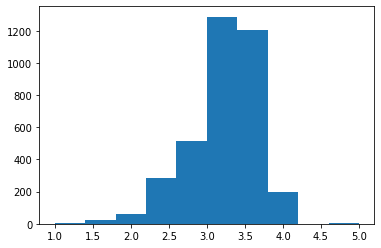

In [20]:
plt.hist(ratings)
plt.show()

We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.

First, let’s find all the tags on the webpage that contain the company names.